# Epidemics on networks


The spread of epidemics on networks has been extensively studied in the last ten years. Epidemic
transmission has a variety of important behaviours, independent on the characteristics of the disease
and the network its spreads on. In this project, a briefly introduction to the study of epidemics on
networks and SIS (susceptible-infection-susceptible) epidemic model will be provided.
We will also observe the difference in epidemic behaviour when comparing real and random networks,
which leads to the suggestion that it is insufficient to analyse such behaviour using only random networks.

## Objective 
By the end of this case study, you will be able to answer the following questions:

* Testing vaccination strategies of difference proportions of the pop-ulation
* Comparing real world and random networks

In [2]:
%pylab inline
import numpy as np
import scipy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
 

Populating the interactive namespace from numpy and matplotlib


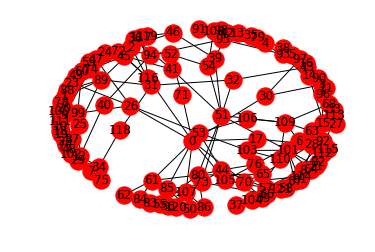

In [2]:
G=nx.read_weighted_edgelist('Electronic1.txt')
A=nx.to_numpy_matrix(G)
G=nx.from_numpy_matrix(A)
nx.draw_networkx(G)
plt.axis('off')
plt.savefig("pth2.png")
plt.show()


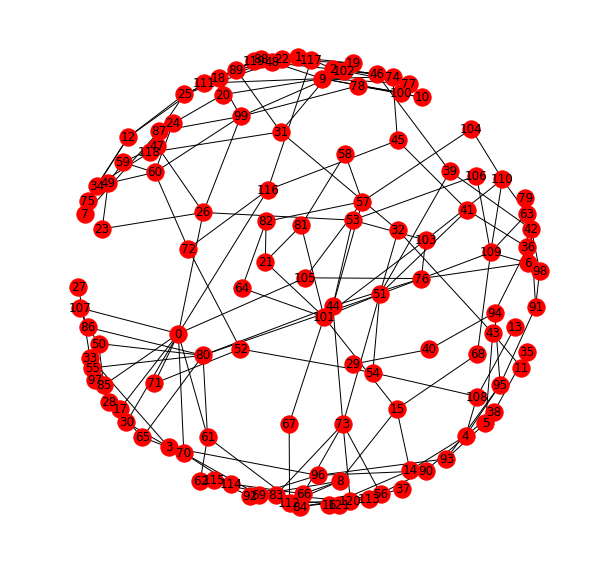

In [3]:
G2=nx.from_numpy_matrix(A)
plt.figure(figsize=(10,10))
plt.clf()
pos=nx.spring_layout(G2)
nx.draw_networkx(G2)
#nx.draw_networkx_edges(G2,pos)
plt.axis('off')
plt.savefig("pth2.png")
plt.show()

In [4]:
#eigen_centrality=nx.eigenvector_centrality(G2)
#print(eigen_centrality)
#sorted(eigen_centrality)
print nx.info(G)
print nx.is_directed(G)

Name: 
Type: Graph
Number of nodes: 122
Number of edges: 189
Average degree:   3.0984
False


In [7]:
#c=[(eigen_centrality[key], key) for key in eigen_centrality]
    #cc=sorted(c)[0:]
#cc

In [8]:
#list(A)

In [15]:
def epi_step(A, p, n, gamma, beta):
    q = np.zeros(n)
    for i in range(n):
        z = 1
        for j in range(n):
            z = z*(1-beta*A[i,j]*p[j])
        q[i] = (1-p[i])*z+gamma*p[i]*z
    p = 1-q
    return p


In [10]:
def trial(A, gamma, beta, m, init):
    t = np.zeros(m)
    n = len(A)
    p=init #vector of zeroes
    for i in range(m):#loop updates values of t and p
        t[i] = sum(p)
        p = epi_step(A, p, n, gamma, beta)
    return t,p

In [17]:
# initially infect node 31
m=60
gamma=.65
beta=.30
init = np.zeros(len(A))
init[31] = 1
t1,p1 = trial(A,gamma,beta,m,init)
#print(t1,p1)

In [13]:

init


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

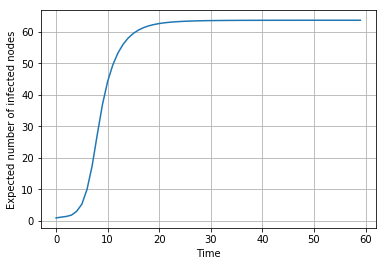

In [190]:
plt.clf()
plt.plot(range(m),t1)
plt.xlabel('Time')
plt.ylabel('Expected number of infected nodes')
plt.legend()
plt.grid()
plt.savefig('fig1.png')

In [191]:
tintegers=t1.astype(int)
tintegers

array([ 1,  1,  1,  1,  3,  5,  9, 17, 27, 36, 44, 49, 53, 55, 57, 59, 60,
       61, 61, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
       63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
       63, 63, 63, 63, 63, 63, 63, 63, 63])

In [192]:
#plt.hist(tintegers)
#plt.xlabel('muse')
#plt.ylabel('muse')

In [193]:
# initially infect node 25
m=60
gamma=.65
beta=.30
init = np.zeros(len(A))
init[25] = 1
t2,p1 = trial(A,gamma,beta,m,init)
#print(t2,p1)

In [194]:
init[25] =1
init

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

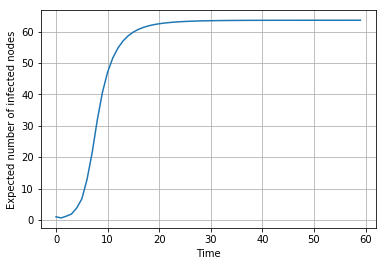

In [195]:
plt.clf()
plt.plot(range(m),t2)
plt.xlabel('Time')
plt.ylabel('Expected number of infected nodes')
plt.legend()
plt.grid()
plt.savefig('fig2.png')

In [196]:
tinteger1=t2.astype(int)
tinteger1

array([ 1,  0,  1,  1,  3,  6, 12, 21, 31, 40, 47, 51, 54, 57, 58, 59, 60,
       61, 61, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
       63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
       63, 63, 63, 63, 63, 63, 63, 63, 63])

In [197]:
# Random initial infectivity (with mean 1)
m=60
gamma=.65
beta=.30
init = np.random.rand(len(A))
init =init/sum(init)
#init[20]=1
t3,p1 = trial(A,gamma,beta,m,init)
#print(t3,p1)

In [198]:
np.mean(init)

0.006666666666666668

In [199]:
init

array([ 0.00442628,  0.009106  ,  0.01321785,  0.00223513,  0.00306542,
        0.00634287,  0.01007262,  0.0068896 ,  0.00208943,  0.00662966,
        0.00786172,  0.00628733,  0.0107513 ,  0.00930439,  0.00590294,
        0.0104765 ,  0.00393199,  0.00416309,  0.00512039,  0.00552525,
        0.00072061,  0.00989735,  0.00214337,  0.00177727,  0.01248894,
        0.00963157,  0.00803069,  0.00872452,  0.0099821 ,  0.00086252,
        0.01271259,  0.00958128,  0.00275924,  0.00997132,  0.00417515,
        0.00661404,  0.00976077,  0.00414751,  0.00644212,  0.01304668,
        0.00251074,  0.00062395,  0.00841037,  0.00974943,  0.00756536,
        0.00999903,  0.00658753,  0.00512032,  0.01158991,  0.00382382,
        0.01007996,  0.00083872,  0.00877318,  0.0008642 ,  0.00750811,
        0.00866105,  0.00813002,  0.01253052,  0.01303918,  0.00790517,
        0.01154654,  0.00219396,  0.00915556,  0.01146383,  0.01186684,
        0.00379075,  0.01198142,  0.00273197,  0.00622876,  0.01

In [200]:
tinteger2=t3.astype(int)
tinteger2

array([ 1,  1,  2,  3,  8, 15, 24, 34, 42, 47, 51, 54, 57, 58, 59, 60, 61,
       61, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
       63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
       63, 63, 63, 63, 63, 63, 63, 63, 63])

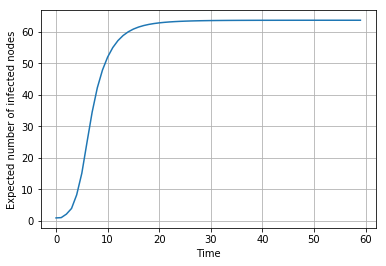

In [201]:
plt.clf()
plt.plot(range(m),t3)
plt.xlabel('Time')
plt.xlabel('Time')
plt.ylabel('Expected number of infected nodes')
plt.legend()
plt.grid()
plt.savefig('fig3.png')

In [202]:
#Remove four nodes with randomly from graph
B = A
B[:,3]=0
B[3,:]=0
B[:,30]=0
B[30,:]=0
B[:,100]=0
B[100,:]=0
B[:,65]=0
B[65,:]=0
m=60
gamma=.65
beta=.30
init = np.random.rand(len(A))
init =init/sum(init)
t6,p1 = trial(B,gamma,beta,m,init)

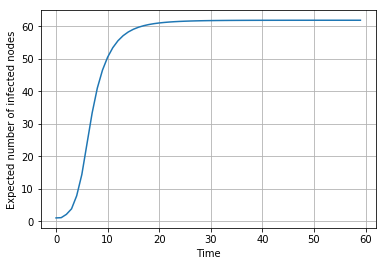

In [203]:
plt.clf()
plt.plot(range(m),t6)
plt.xlabel('Time')
plt.ylabel('Expected number of infected nodes')
plt.legend()
plt.grid()
plt.savefig('fig6.png')

In [224]:
# Find 4 nodes with highest betwenness centrality
G=nx.read_weighted_edgelist('Software Digital.txt')
A=nx.to_numpy_matrix(G)
G=nx.from_numpy_matrix(A)
n=len(A)
dic=nx.betweenness_centrality(G)
a = [(dic[key], key) for key in dic]
b=(sorted(a,reverse=False)[n-5:n])
print(b[3][1],b[2][1],b[1][1],b[0][1])

(48, 105, 94, 117)


In [205]:
b

[(0.15260207474972565, 117),
 (0.2377914260002877, 94),
 (0.26686914321671973, 105),
 (0.335668207280111, 48),
 (0.36200035558432475, 144)]

In [206]:
#Remove node with highest betwenness centrality from graph
B = A
B[:,48]=0
B[48,:]=0
m=60
gamma=.65
beta=.40
init = np.random.rand(len(A))
init =init/sum(init)
t4,p1 = trial(B,gamma,beta,m,init)
#print(t4,p1)

In [207]:
tinteger3=t4.astype(int)
tinteger3

array([ 1,  1,  3,  6, 14, 27, 42, 53, 61, 67, 72, 75, 77, 79, 80, 81, 82,
       82, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84,
       84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84,
       84, 84, 84, 84, 84, 84, 84, 84, 84])

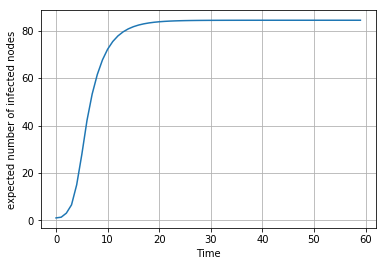

In [208]:
plt.clf()
plt.plot(range(m),t4)
plt.xlabel('Time')
plt.ylabel('expected number of infected nodes')
plt.legend()
plt.grid()
plt.savefig('fig4.png')

In [225]:
#Remove four nodes with highest betwenness centrality from graph
B = A
B[:,48]=0
B[48,:]=0
B[:,105]=0
B[105,:]=0
B[:,94]=0
B[94,:]=0
B[:,117]=0
B[117,:]=0
m=60
gamma=.65
beta=.30
init = np.random.rand(len(A))
init =init/sum(init)
t5,p1 = trial(B,gamma,beta,m,init)

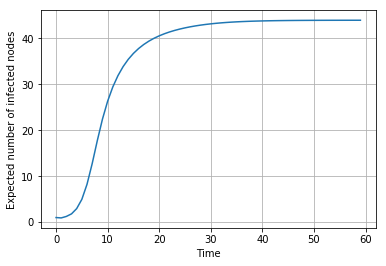

In [226]:
plt.clf()
plt.plot(range(m),t5)
plt.xlabel('Time')
plt.ylabel('Expected number of infected nodes')
plt.legend()
plt.grid()
plt.savefig('fig5.png')

In [227]:
tinteger4=t5.astype(int)
tinteger4

array([ 1,  0,  1,  1,  2,  4,  8, 12, 17, 22, 26, 29, 31, 33, 35, 36, 37,
       38, 39, 39, 40, 40, 41, 41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43])

In [228]:
# Find 4 nodes with highest degree centrality
G=nx.read_weighted_edgelist('Software Digital.txt')
A=nx.to_numpy_matrix(G)
G=nx.from_numpy_matrix(A)
n=len(A)
dic=nx.degree_centrality(G)
a = [(dic[key], key) for key in dic]
b=(sorted(a,reverse=False)[n-5:n])
print(b[3][1],b[2][1],b[1][1],b[0][1])

(144, 51, 129, 93)


In [229]:
#Remove four nodes with highest degree centrality from graph
B = A
B[:,144]=0
B[144,:]=0
B[:,51]=0
B[51,:]=0
B[:,129]=0
B[129,:]=0
B[:,93]=0
B[93,:]=0
m=60
gamma=.65
beta=.30
init = np.random.rand(len(A))
init =init/sum(init)
t7,p1 = trial(B,gamma,beta,m,init)

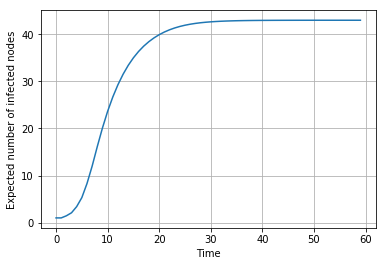

In [230]:
plt.clf()
plt.plot(range(m),t7)
plt.xlabel('Time')
plt.ylabel('Expected number of infected nodes')
plt.legend()
plt.grid()
plt.savefig('fig7.png')

In [231]:
tinteger7=t7.astype(int)
tinteger7

array([ 1,  0,  1,  2,  3,  5,  8, 12, 16, 20, 23, 26, 29, 31, 33, 35, 36,
       37, 38, 39, 39, 40, 40, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42,
       42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42,
       42, 42, 42, 42, 42, 42, 42, 42, 42])

In [232]:
# Find 4 nodes with highest eigenvector centrality
G=nx.read_weighted_edgelist('Software Digital.txt')
A=nx.to_numpy_matrix(G)
G=nx.from_numpy_matrix(A)
n=len(A)
dic=nx.eigenvector_centrality(G)
a = [(dic[key], key) for key in dic]
b=(sorted(a,reverse=False)[n-5:n])
print(b[3][1],b[2][1],b[1][1],b[0][1])

(144, 51, 129, 48)


In [237]:
#Remove four nodes with highest eigenvector centrality from graph
B = A
B[:,144]=0
B[144,:]=0
B[:,51]=0
B[51,:]=0
B[:,129]=0
B[129,:]=0
B[:,48]=0
B[48,:]=0
m=60
gamma=.65
beta=.30
init = np.random.rand(len(A))
init =init/sum(init)
t8,p1 = trial(B,gamma,beta,m,init)

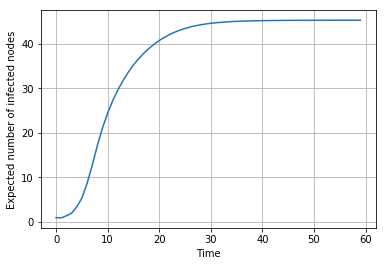

In [238]:
plt.clf()
plt.plot(range(m),t8)
plt.xlabel('Time')
plt.ylabel('Expected number of infected nodes')
plt.legend()
plt.grid()
plt.savefig('fig7.png')

In [239]:
tinteger8=t8.astype(int)
tinteger8

array([ 1,  0,  1,  1,  3,  5,  8, 12, 17, 21, 24, 27, 29, 31, 33, 35, 36,
       37, 38, 39, 40, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 44, 44, 44,
       44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
       45, 45, 45, 45, 45, 45, 45, 45, 45])

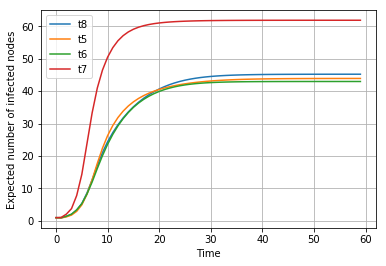

In [240]:
plt.clf()
plt.plot(range(m),t8)
plt.plot(range(m),t5)
plt.plot(range(m),t7)
plt.plot(range(m),t6)
plt.xlabel('Time')
plt.ylabel('Expected number of infected nodes')
plt.legend(['t8','t5','t6','t7'])
plt.grid()
plt.savefig('fig8.png')